# Read data on regolith cover and thickness extracted from facet simulations, and plot the results

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
filename = 'regolith_analysis20180910.csv'

In [3]:
# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
dist_param = np.zeros(num_lines - 1)  # skip 1 header line
weath_param = np.zeros(num_lines - 1)
reg_cover_proportion = np.zeros(num_lines - 1)
reg_thickness = np.zeros(num_lines - 1)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(','.join(row) + '\n')
        if i >= 1:
            dist_param[i-1] = row[1]
            weath_param[i-1] = row[2]
            reg_cover_proportion[i-1] = row[3]
            reg_thickness[i-1] = row[9]
        i += 1

Run name,Disturbance rate parameter,Weathering rate parameter,Proportion regolith,Proportion rock,Number regolith-air pairs,Number rock-air pairs,Number surface pairs,Total regolith cells,Regolith thickness

d-30w-23,0.001,0.00501187233627,0.643312101911,0.356687898089,101,56,157,51,0.645569620253

d-40w-36,0.0001,0.000251188643151,0.207171314741,0.792828685259,52,199,251,30,0.379746835443

d-40w-31,0.0001,0.000794328234724,0.40782122905,0.59217877095,73,106,179,38,0.481012658228

d-30w-24,0.001,0.00398107170553,0.906832298137,0.0931677018634,146,15,161,73,0.924050632911

d-40w-38,0.0001,0.000158489319246,0.211320754717,0.788679245283,56,209,265,31,0.392405063291

d-30w-12,0.001,0.063095734448,0.987261146497,0.0127388535032,155,2,157,78,0.987341772152

d-30w-15,0.001,0.0316227766017,0.936305732484,0.0636942675159,147,10,157,74,0.936708860759

d-30w-14,0.001,0.0398107170553,0.987261146497,0.0127388535032,155,2,157,78,0.987341772152

d-40w-39,0.0001,0.000125892541179,0.154098360656,0.845

In [4]:
tau = 500.0  # average interval between one-cell slip events (corresponds to numerical model interval of 866 yr)
dprime = dist_param * tau
wprime = weath_param * tau
data = {'d': dist_param, 'dprime': dprime, 'w': weath_param, 'wprime': wprime, 'cover': reg_cover_proportion}
df = pd.DataFrame(data)
df = df.sort_values(by=['dprime', 'wprime'])
df

,d,dprime,w,wprime,cover
53,0.0001,0.05,0.000100,0.050000,0.175896
8,0.0001,0.05,0.000126,0.062946,0.154098
4,0.0001,0.05,0.000158,0.079245,0.211321
12,0.0001,0.05,0.000200,0.099763,0.267658
1,0.0001,0.05,0.000251,0.125594,0.207171
65,0.0001,0.05,0.000316,0.158114,0.297872
72,0.0001,0.05,0.000398,0.199054,0.280543
76,0.0001,0.05,0.000501,0.250594,0.449275
62,0.0001,0.05,0.000631,0.315479,0.406091
2,0.0001,0.05,0.000794,0.397164,0.407821


In [5]:
reg_cover_proportion = df['cover'].values.reshape((4, 31))
wprime = df['wprime'].values.reshape((4, 31))
dprime = df['dprime'].values.reshape((4, 31))
wprime

array([[ 0.05      ,  0.06294627,  0.07924466,  0.09976312,  0.12559432,
         0.15811388,  0.19905359,  0.25059362,  0.31547867,  0.39716412,
         0.5       ,  0.62946271,  0.7924466 ,  0.99763116,  1.25594322,
         1.58113883,  1.99053585,  2.50593617,  3.15478672,  3.97164117,
         5.        ,  6.29462706,  7.92446596,  9.97631157, 12.55943216,
        15.8113883 , 19.90535853, 25.05936168, 31.54786722, 39.71641174,
        50.        ],
       [ 0.05      ,  0.06294627,  0.07924466,  0.09976312,  0.12559432,
         0.15811388,  0.19905359,  0.25059362,  0.31547867,  0.39716412,
         0.5       ,  0.62946271,  0.7924466 ,  0.99763116,  1.25594322,
         1.58113883,  1.99053585,  2.50593617,  3.15478672,  3.97164117,
         5.        ,  6.29462706,  7.92446596,  9.97631157, 12.55943216,
        15.8113883 , 19.90535853, 25.05936168, 31.54786722, 39.71641174,
        50.        ],
       [ 0.05      ,  0.06294627,  0.07924466,  0.09976312,  0.12559432,
       

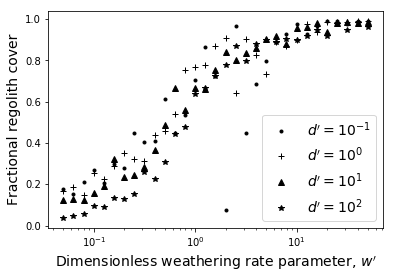

In [6]:
psyms = ['k.', 'k+', 'k^', 'k*']

# Plot the weathering + disturbance runs
for d in range(4):
    plt.semilogx(wprime[d,:], reg_cover_proportion[d,:], psyms[d])

# Labels and legend
plt.xlabel(r"Dimensionless weathering rate parameter, $w'$", fontsize=14)
plt.ylabel('Fractional regolith cover', fontsize=14)
plt.legend([r"$d'= 10^{-1}$", r"$d'= 10^0$", r"$d'= 10^1$", r"$d'= 10^2$", r"$d' \rightarrow \infty$", r"$\theta = 60^\circ - 360 w' / \pi$", r"$\theta = 30^\circ$"], fontsize=14)

plt.savefig('reg_cover_vs_wprime.pdf')